<a href="https://colab.research.google.com/github/Elwing-Chou/ximen1129/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
trans = [       
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

automobile


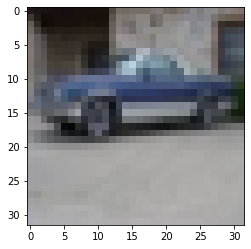

In [ ]:
# mnist(60000): [5, 7, 9...]
# cifar10(50000, 1): [[5], [7], [9]]
# y_train
import matplotlib.pyplot as plt
idx = 10000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3) * 64 + 64(bias)
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64) * 128 + 128(bias)
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

In [ ]:
# GAP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3) * 64 + 64(bias)
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64) * 128 + 128(bias)
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

In [ ]:
# Sparse: 只存不是0的地方->不用做one-hot encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

In [19]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.6308 - accuracy: 0.7851


[0.6307702660560608, 0.785099983215332]

In [26]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([3, 8, 8, ..., 5, 1, 7])

In [28]:
# the same: y_test.reshape(-1)
y_test_reshape = y_test.reshape(10000)
y_test_reshape

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [29]:
# tensorflow: one-hot sklearn: original
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(True)".format(trans[i]) for i in range(10)],
      columns=["{}(Pred)".format(trans[i]) for i in range(10)])

,airplane(Pred),automobile(Pred),bird(Pred),cat(Pred),deer(Pred),dog(Pred),frog(Pred),horse(Pred),ship(Pred),truck(Pred)
airplane(True),823,10,35,15,17,11,8,12,46,23
automobile(True),23,875,0,4,0,2,3,5,20,68
bird(True),51,2,683,60,84,42,39,25,8,6
cat(True),15,6,64,630,60,130,50,25,7,13
deer(True),10,1,46,43,786,24,24,59,6,1
dog(True),6,3,32,176,48,668,18,37,7,5
frog(True),4,5,53,48,38,21,819,3,5,4
horse(True),14,0,23,39,50,35,6,824,1,8
ship(True),47,19,11,15,9,3,4,1,862,29
truck(True),24,52,7,8,2,7,2,5,12,881


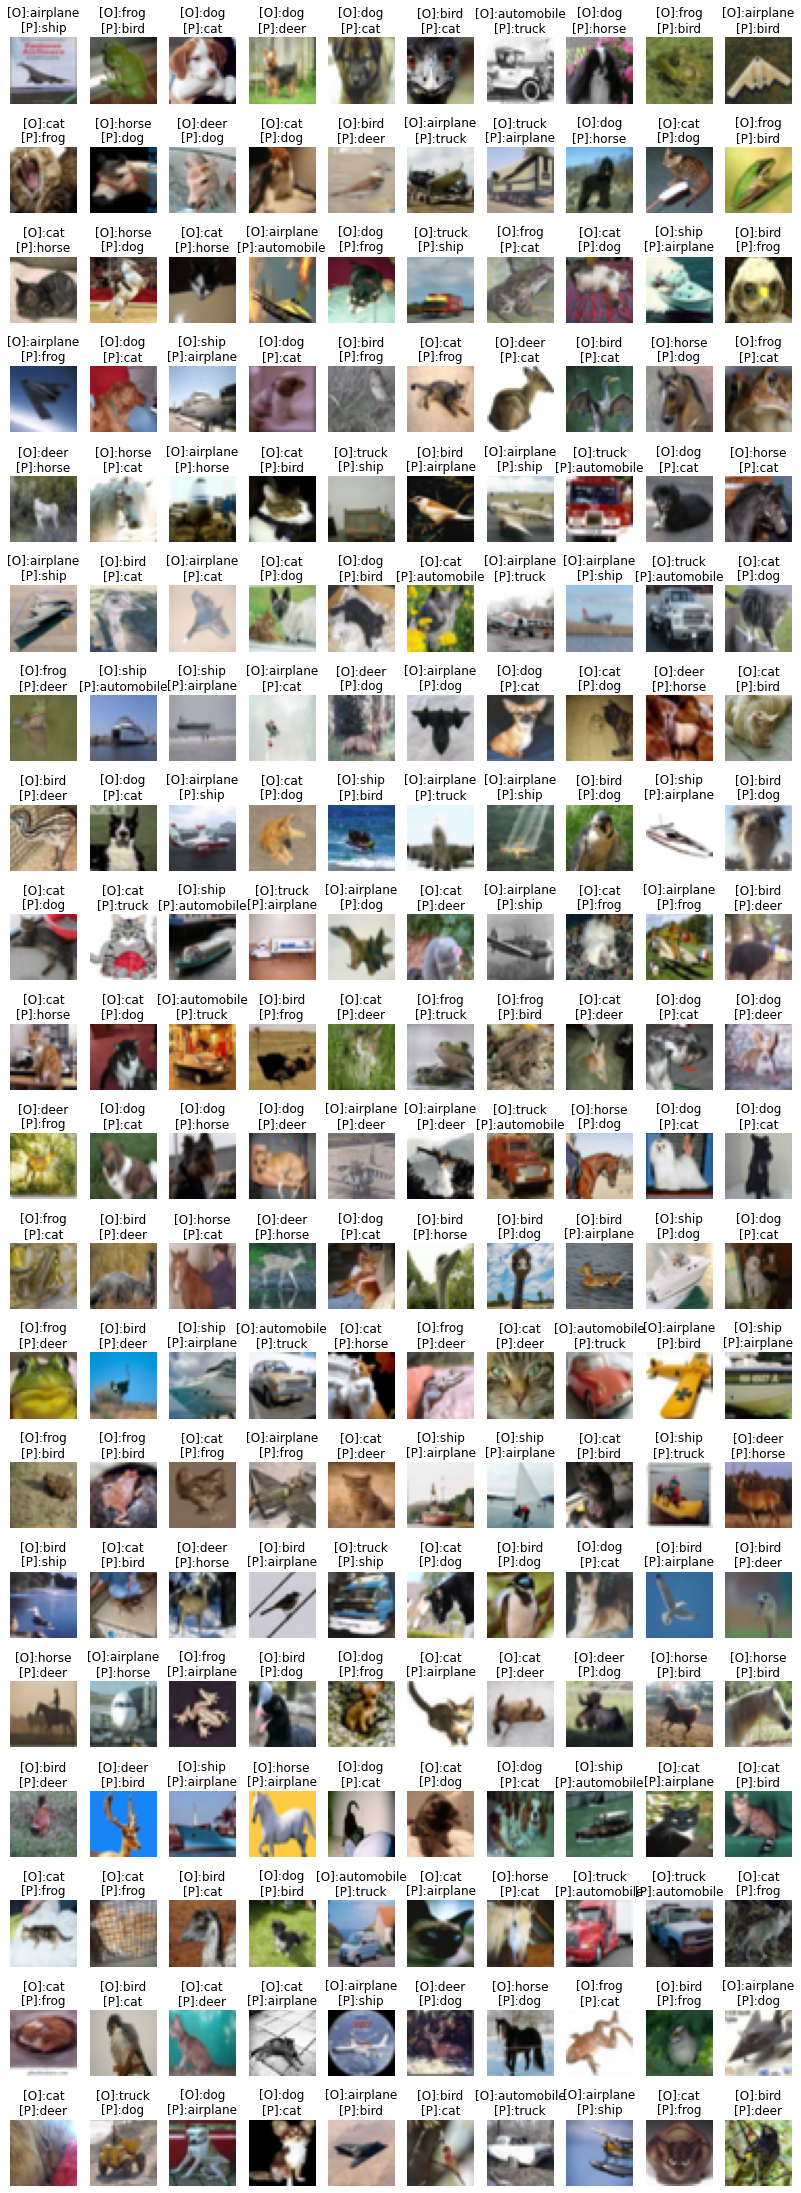

In [30]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.nonzero(y_test_reshape != pre)[0]
idx = idx[:200]
pre_false_label = y_test_reshape[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

url:http://i2.kknews.cc/W5fM7yHypujZx97SToYM54Zei5Fxd5kzzXQOMMI/0.jpg
airplane : 0.0
automobile : 0.0
bird : 0.0
cat : 1.0
deer : 0.0
dog : 0.0
frog : 0.0
horse : 0.0
ship : 0.0
truck : 0.0


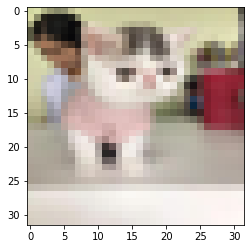

In [39]:
import requests
import numpy as np
# Pillow
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_pre = np.array(img).reshape(1, 32, 32, 3)
proba = model.predict(img_pre)[0]
for i in range(10):
    print(trans[i], ":", round(proba[i], 5))
plt.imshow(img)